In [71]:
import pandas as pd

# Replace 'your_file.csv' with the actual path to your CSV file
file_path = '/Users/saketmanolkar/Desktop/2022dataset.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Assuming you want to fill empty fields with 'NA'
df.fillna('NA', inplace=True)



In [72]:
df

,Country Name,GDP,GDP_Growth,GDP_PerCap,Emp_Growth,UnEmployment,Literacy_Rate,Safe_Water_Rate,15-24_Fem_Employment,Labels
0,Aruba,NA,NA,NA,NA,NA,NA,NA,NA,NA
1,Africa Eastern and Southern,1169480000000.0,3.404852,1622.39172,64.456214,7.916835,72.600403,NA,49.267307,NA
2,Afghanistan,NA,NA,NA,NA,NA,NA,30.034098,NA,NA
3,Africa Western and Central,877863000000.0,3.762758,1790.3488,58.90269,4.742175,60.312698,29.456889,31.900686,NA
4,Angola,106714000000.0,3.045403,2998.501158,69.025,10.209,72.400002,NA,56.181,NA
...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,9429156202.0,3.511707,5351.439542,NA,NA,NA,NA,NA,NA
262,"Yemen, Rep.",NA,NA,676.928385,33.127,13.59,NA,NA,5.268,NA
263,South Africa,405870000000.0,2.042299,6776.480077,39.874,29.806,NA,NA,26.39,NA
264,Zambia,29784454056.0,4.744942,1487.907764,56.943,6.131,NA,NA,35.113,NA


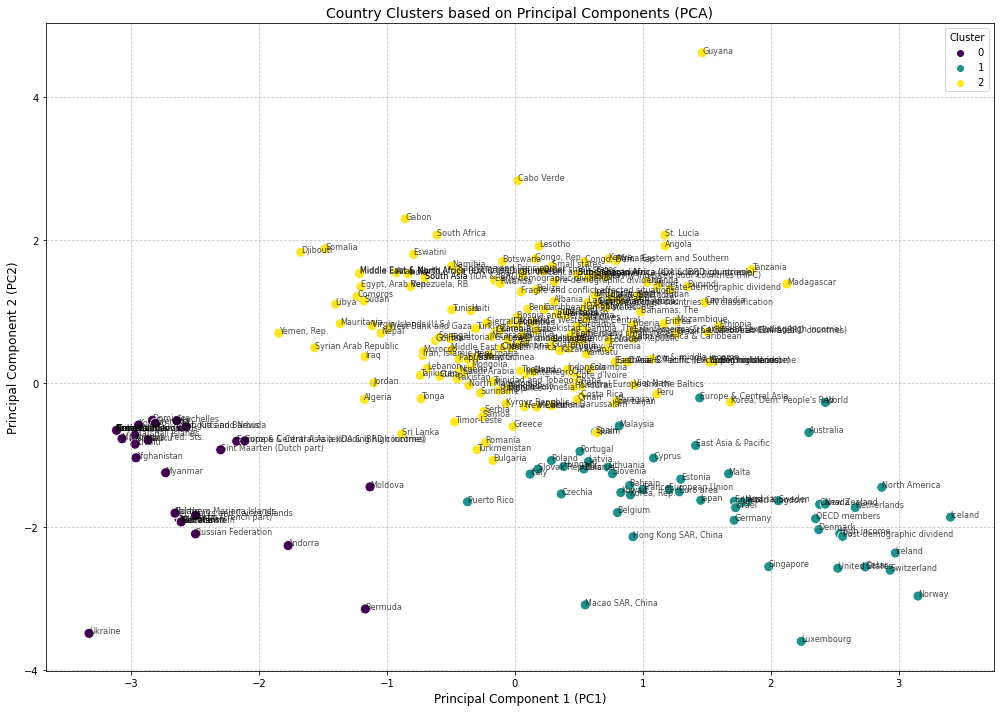

Cluster 0 (Second World):
Afghanistan, American Samoa, Andorra, Antigua and Barbuda, Aruba, Bermuda, British Virgin Islands, Cayman Islands, Curacao, Dominica, Europe & Central Asia (IDA & IBRD countries), Europe & Central Asia (excluding high income), Faroe Islands, Gibraltar, Greenland, Grenada, Isle of Man, Kiribati, Kosovo, Liechtenstein, Marshall Islands, Micronesia, Fed. Sts., Moldova, Monaco, Myanmar, Nauru, Northern Mariana Islands, Not classified, Palau, Russian Federation, San Marino, Seychelles, Sint Maarten (Dutch part), St. Kitts and Nevis, St. Martin (French part), Turks and Caicos Islands, Tuvalu, Ukraine


Cluster 1 (First World):
Australia, Austria, Bahrain, Belarus, Belgium, Canada, Cyprus, Czechia, Denmark, East Asia & Pacific, Estonia, Euro area, Europe & Central Asia, European Union, Finland, France, Germany, High income, Hong Kong SAR, China, Hungary, Iceland, Ireland, Israel, Italy, Japan, Korea, Rep., Kuwait, Latvia, Lithuania, Luxembourg, Macao SAR, China, Mala

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

# Load the dataframe
# Assuming your dataframe is named df
# Note: Replace 'NA' with np.nan for proper handling of missing values
df.replace('NA', np.nan, inplace=True)

# Select relevant columns for clustering
columns_for_clustering = ['GDP', 'GDP_Growth', 'GDP_PerCap', 'Emp_Growth', 'UnEmployment', 'Literacy_Rate', 'Safe_Water_Rate', '15-24_Fem_Employment']

# Drop rows with missing values in the selected columns
df_cluster = df[columns_for_clustering].copy()  # Create a copy to avoid the SettingWithCopyWarning

# Impute missing values with 0
imputer = SimpleImputer(strategy='constant', fill_value=0)
df_cluster.loc[:, columns_for_clustering] = imputer.fit_transform(df_cluster)

# Define weights for each feature in the specified order
weights = [0.5, 0.4, 0.3, 0.3, -0.3, 0.25, 0.2, 0.3]

# Apply weights manually to each column
for col, weight in zip(columns_for_clustering, weights):
    df_cluster[col] *= weight

# Standardize the features
scaler = StandardScaler(with_mean=True, with_std=True)
df_cluster_scaled = scaler.fit_transform(df_cluster)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
df_cluster_pca = pd.DataFrame(pca.fit_transform(df_cluster_scaled), columns=['PC1', 'PC2'])

# Apply k-means clustering with k=3 on the reduced data
kmeans = KMeans(n_clusters=3, random_state=42)
df_cluster_pca['Cluster'] = kmeans.fit_predict(df_cluster_scaled)

# Set a larger plot size
plt.figure(figsize=(14, 10))

# Scatter plot with different colors for each cluster
scatter = sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_cluster_pca, palette='viridis', edgecolor='w', s=100)

# Annotate points with country names
for i, country in enumerate(df['Country Name']):
    plt.annotate(country, (df_cluster_pca['PC1'].iloc[i], df_cluster_pca['PC2'].iloc[i]), fontsize=8, alpha=0.7)

# Set plot labels and title
plt.xlabel('Principal Component 1 (PC1)', fontsize=12)
plt.ylabel('Principal Component 2 (PC2)', fontsize=12)
plt.title('Country Clusters based on Principal Components (PCA)', fontsize=14)

# Add legend
plt.legend(title='Cluster', fontsize=10)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

for cluster_num in range(3):
    cluster_countries = df[df_cluster_pca['Cluster'] == cluster_num]['Country Name'].tolist()
    cluster_countries.sort()  # Sort the country names alphabetically
    print(f'Cluster {cluster_num} ({"Second World" if cluster_num == 0 else "First World" if cluster_num == 1 else "Third World"}):')
    print(', '.join(cluster_countries))
    print('\n')


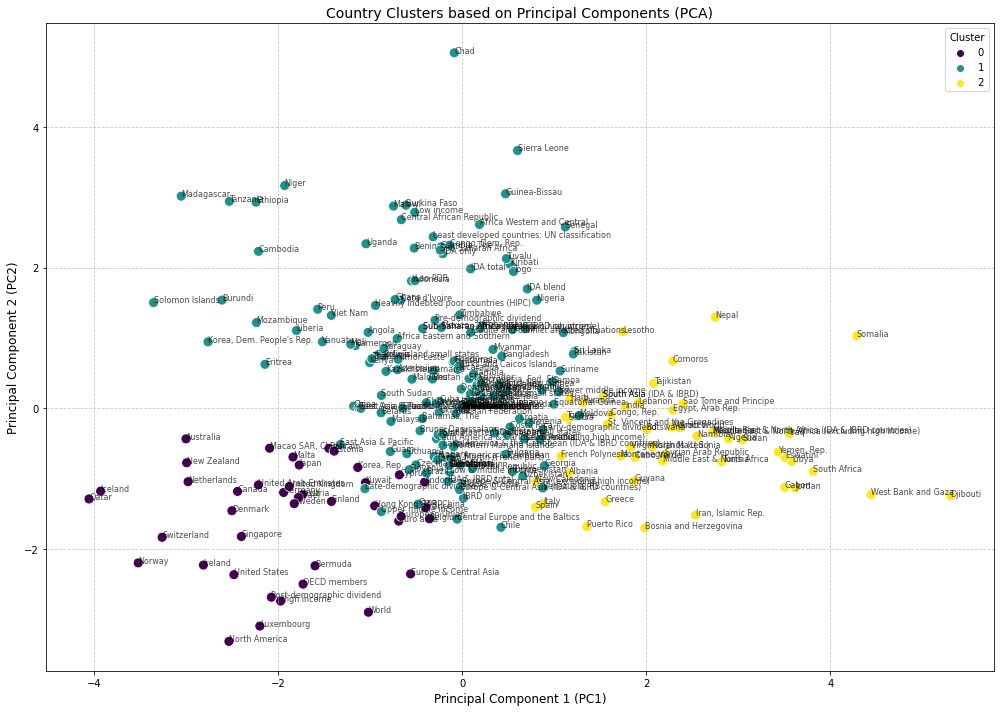

Cluster 0 (Second World):
Andorra, Australia, Austria, Bahrain, Belgium, Bermuda, Canada, Cyprus, Denmark, Estonia, Euro area, Europe & Central Asia, European Union, Finland, France, Germany, High income, Hong Kong SAR, China, Iceland, Ireland, Israel, Japan, Korea, Rep., Kuwait, Luxembourg, Macao SAR, China, Malta, Netherlands, New Zealand, North America, Norway, OECD members, Post-demographic dividend, Qatar, Singapore, Sweden, Switzerland, United Arab Emirates, United Kingdom, United States, World


Cluster 1 (First World):
Afghanistan, Africa Eastern and Southern, Africa Western and Central, American Samoa, Angola, Antigua and Barbuda, Argentina, Armenia, Aruba, Azerbaijan, Bahamas, The, Bangladesh, Barbados, Belarus, Belize, Benin, Bhutan, Bolivia, Brazil, British Virgin Islands, Brunei Darussalam, Bulgaria, Burkina Faso, Burundi, Cambodia, Cameroon, Caribbean small states, Cayman Islands, Central African Republic, Central Europe and the Baltics, Chad, Channel Islands, Chile, Chin

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

# Load the dataframe
# Assuming your dataframe is named df
# Note: Replace 'NA' with np.nan for proper handling of missing values
df.replace('NA', np.nan, inplace=True)

# Select relevant columns for clustering
columns_for_clustering = ['GDP', 'GDP_Growth', 'GDP_PerCap', 'Emp_Growth', 'UnEmployment', 'Literacy_Rate', 'Safe_Water_Rate', '15-24_Fem_Employment']

# Drop rows with missing values in the selected columns
df_cluster = df[columns_for_clustering].copy()  # Create a copy to avoid the SettingWithCopyWarning

# Impute missing values with mean
imputer = SimpleImputer(strategy='mean')
df_cluster.loc[:, columns_for_clustering] = imputer.fit_transform(df_cluster)

# Define weights for each feature in the specified order
weights = [0.5, 0.4, 0.3, 0.3, -0.3, 0.25, 0.2, 0.3]

# Apply weights manually to each column
for col, weight in zip(columns_for_clustering, weights):
    df_cluster[col] *= weight

# Standardize the features
scaler = StandardScaler(with_mean=True, with_std=True)
df_cluster_scaled = scaler.fit_transform(df_cluster)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
df_cluster_pca = pd.DataFrame(pca.fit_transform(df_cluster_scaled), columns=['PC1', 'PC2'])

# Apply k-means clustering with k=3 on the reduced data
kmeans = KMeans(n_clusters=3, random_state=42)
df_cluster_pca['Cluster'] = kmeans.fit_predict(df_cluster_scaled)

# Set a larger plot size
plt.figure(figsize=(14, 10))

# Scatter plot with different colors for each cluster
scatter = sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_cluster_pca, palette='viridis', edgecolor='w', s=100)

# Annotate points with country names
for i, country in enumerate(df['Country Name']):
    plt.annotate(country, (df_cluster_pca['PC1'].iloc[i], df_cluster_pca['PC2'].iloc[i]), fontsize=8, alpha=0.7)

# Set plot labels and title
plt.xlabel('Principal Component 1 (PC1)', fontsize=12)
plt.ylabel('Principal Component 2 (PC2)', fontsize=12)
plt.title('Country Clusters based on Principal Components (PCA)', fontsize=14)

# Add legend
plt.legend(title='Cluster', fontsize=10)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

for cluster_num in range(3):
    cluster_countries = df[df_cluster_pca['Cluster'] == cluster_num]['Country Name'].tolist()
    cluster_countries.sort()  # Sort the country names alphabetically
    print(f'Cluster {cluster_num} ({"Second World" if cluster_num == 0 else "First World" if cluster_num == 1 else "Third World"}):')
    print(', '.join(cluster_countries))
    print('\n')
